### 10k Runners Data Analysis

The dataset used in this project was taken from a 10K race that took place in Hillsboro, OR on June 2017. The main focus will be on the analysis of the performance of the 10K runners. The data is scraped from the site using Beautiful Soup. Exploratory Data Analysis is done on the data to analyze it.

### Importing the Libraries & Packages

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

from pylab import rcParams
rcParams['figure.figsize']=15,5

### Web Scraping the Data

In [104]:
# Get the html of the page using urlopen

url="http://www.hubertiming.com/results/2017GPTR10K"
html=urlopen(url)

#### Create a Beautiful Soup object from the html. This is done by passing the html to the BeautifulSoup() function. The Beautiful Soup package is used to parse the html, that is, take the raw html text and break it into Python objects.

In [105]:
soup=BeautifulSoup(html,'lxml')
type(soup)

bs4.BeautifulSoup

In [106]:
# Get the title of the page

title=soup.title
title

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>

In [107]:
text=soup.get_text
text

<bound method PageElement.get_text of <!DOCTYPE html>
<html>
<head>
<meta content="Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!" property="og:title"/>
<meta content="Results of the 2017 Intel Great Place to Run \ Urban Clash Games at Hillsboro Stadium in Hillsboro, OR" property="og:description"/>
<meta content="https://www.hubertiming.com/results/2017GPTRForResults.jpg" property="og:image"/>
<meta content="https://www.hubertiming.com/results/2017gptr10k" property="og:url"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.2.1/css/bootstrap.min.css" rel="stylesheet"/>
<link href="https://use.fontawesome.com/releases/v5.13.0/css/all.css" rel="stylesheet"/>
<link href="//cdn.rawgit.com/noelboss/featherlight/1.7.11/release/featherlight.min.css" rel="styleshe

#### You can use the find_all() method of soup to extract useful html tags within a webpage. Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells.

In [108]:
# Get all the hyperlinks in the page

soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

#### You can use a for loop and the get('"href") method to extract and print out only hyperlinks.

In [109]:
all_links=soup.find_all('a')
for links in all_links:
    print(links.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [110]:
# Print the first 10 rows of the table

rows=soup.find_all('tr')
rows[:10]

[<tr colspan="2">
 <b>10K:</b>
 </tr>,
 <tr>
 <td>Finishers:</td>
 <td>577</td>
 </tr>,
 <tr>
 <td>Male:</td>
 <td>414</td>
 </tr>,
 <tr>
 <td>Female:</td>
 <td>163</td>
 </tr>,
 <tr class="header">
 <th>Place</th>
 <th>Bib</th>
 <th>Name</th>
 <th>Gender</th>
 <th>City</th>
 <th>State</th>
 <th>Chip Time</th>
 <th>Gun Time</th>
 <th>Team</th>
 </tr>,
 <tr data-bib="814">
 <td>1</td>
 <td>814</td>
 <td>
 
                     JARED WILSON
 
                 </td>
 <td>M</td>
 <td>TIGARD</td>
 <td>OR</td>
 <td>36:21</td>
 <td>36:24</td>
 <td></td>
 </tr>,
 <tr data-bib="573">
 <td>2</td>
 <td>573</td>
 <td>
 
                     NATHAN A SUSTERSIC
 
                 </td>
 <td>M</td>
 <td>PORTLAND</td>
 <td>OR</td>
 <td>36:42</td>
 <td>36:45</td>
 <td>
 <img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                             INTEL TEAM F
                         </td>
 </tr>,
 <tr data-bib="687">
 <td>3</td>
 

#### Converting the table data into Dataframe

In [144]:
# Get all the cells in the table

list_rows=[]

for row in rows:
    row_td=row.find_all('td')
    # Remove the html tags using BeautifulSoup

    str_cells=str(row_td)
    cleantext=BeautifulSoup(str_cells,'lxml').get_text()
    cleantext=cleantext.replace('\r','').replace('\n','')
    list_rows.append(cleantext)
print(list_rows)

['[]', '[Finishers:, 577]', '[Male:, 414]', '[Female:, 163]', '[]', '[1, 814,                     JARED WILSON                , M, TIGARD, OR, 36:21, 36:24, ]', '[2, 573,                     NATHAN A SUSTERSIC                , M, PORTLAND, OR, 36:42, 36:45,                             INTEL TEAM F                        ]', '[3, 687,                     FRANCISCO MAYA                , M, PORTLAND, OR, 37:44, 37:48, ]', '[4, 623,                     PAUL MORROW                , M, BEAVERTON, OR, 38:34, 38:37, ]', '[5, 569,                     DEREK G OSBORNE                , M, HILLSBORO, OR, 39:21, 39:24,                             INTEL TEAM F                        ]', '[6, 642,                     JONATHON TRAN                , M, PORTLAND, OR, 39:49, 39:55, ]', '[7, 144,                     GEORGE TOTONCHY                , M, PORTLAND, OR, 40:04, 40:17, ]', '[8, 395,                     BENJAMIN C CHAFFIN                , M, PORTLAND, OR, 40:05, 40:09, ]', '[9, 7,                 

In [114]:
df=pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, JARED WILSON ..."
6,"[2, 573, NATHAN A SUSTERSI..."
7,"[3, 687, FRANCISCO MAYA ..."
8,"[4, 623, PAUL MORROW ..."
9,"[5, 569, DEREK G OSBORNE ..."


### Data Manipulation and Cleaning

In [115]:
df1=df[0].str.split(',',expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,[2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,[3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...


In [116]:
df1[0]=df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...


In [117]:
col_labels=soup.find_all('th')

In [118]:
all_header=[]
col_str=str(col_labels)
cleantext2=BeautifulSoup(col_str,'lxml').get_text()
all_header.append(cleantext2)
all_header

['[Place, Bib, Name, Gender, City, State, Chip Time, Gun Time, Team]']

In [119]:
df2=pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [120]:
df3=df2[0].str.split(',',expand=True)
df3.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]


In [121]:
frames=[df3,df1]

df4=pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]


In [122]:
df5=df4.rename(columns=df4.iloc[0])
df5.head(10)

,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]


In [123]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Gun Time   578 non-null    object
 8    Team]      578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

In [124]:
df6=df5.dropna(axis=0,how='any')
df6

,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY ...,F,OTHER,OR,1:38:17,1:38:34,]
578,574,467,ROHIT B DSOUZA ...,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I ...
579,575,471,CENITA D'SOUZA ...,F,PORTLAND,OR,1:38:32,1:40:34,]
580,576,338,PRANAVI APPANA ...,F,HILLSBORO,OR,1:40:47,1:42:01,]


In [125]:
df7=df6.drop(df6.index[0])
df7

,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...
...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY ...,F,OTHER,OR,1:38:17,1:38:34,]
578,574,467,ROHIT B DSOUZA ...,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I ...
579,575,471,CENITA D'SOUZA ...,F,PORTLAND,OR,1:38:32,1:40:34,]
580,576,338,PRANAVI APPANA ...,F,HILLSBORO,OR,1:40:47,1:42:01,]


In [126]:
df7.rename(columns={'[Place':'Place'},inplace=True)
df7.rename(columns={' Team]':'Team'},inplace=True)
df7.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...
10,6,642,JONATHON TRAN ...,M,PORTLAND,OR,39:49,39:55,]
11,7,144,GEORGE TOTONCHY ...,M,PORTLAND,OR,40:04,40:17,]
12,8,395,BENJAMIN C CHAFFIN ...,M,PORTLAND,OR,40:05,40:09,]
13,9,7,BRANDON THOMAS ...,M,,,40:17,40:24,COLUMBIA TEAM B ...
14,10,3,ERIK BJORNSTAD ...,M,,,40:21,40:25,COLUMBIA TEAM A ...


In [127]:
df7['Team']=df7['Team'].str.strip(']')
df7.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...
10,6,642,JONATHON TRAN ...,M,PORTLAND,OR,39:49,39:55,
11,7,144,GEORGE TOTONCHY ...,M,PORTLAND,OR,40:04,40:17,
12,8,395,BENJAMIN C CHAFFIN ...,M,PORTLAND,OR,40:05,40:09,
13,9,7,BRANDON THOMAS ...,M,,,40:17,40:24,COLUMBIA TEAM B ...
14,10,3,ERIK BJORNSTAD ...,M,,,40:21,40:25,COLUMBIA TEAM A ...


### Data Analysis and Visualization

#### Average finish time (in minutes) for the runners
        Inorder to find this the column "Chip Time" needs to be converted into just minutes.

In [128]:
time=df7[' Chip Time'].to_list()

time_mins=[]
for time in time:
    if len(time.split(':'))==2:
        m,s=time.split(':')
        math=int(m)+int(s)/60
    else:
        h,m,s=time.split(':')
        math=int(h)*60+int(m)+int(s)/60
    time_mins.append(math)
time_mins

[36.35,
 36.7,
 37.733333333333334,
 38.56666666666667,
 39.35,
 39.81666666666667,
 40.06666666666667,
 40.083333333333336,
 40.28333333333333,
 40.35,
 40.46666666666667,
 40.6,
 40.71666666666667,
 41.016666666666666,
 41.31666666666667,
 41.71666666666667,
 41.983333333333334,
 42.38333333333333,
 42.483333333333334,
 42.583333333333336,
 42.6,
 42.61666666666667,
 42.93333333333333,
 43.43333333333333,
 43.45,
 43.666666666666664,
 43.7,
 43.71666666666667,
 43.766666666666666,
 43.766666666666666,
 43.78333333333333,
 43.78333333333333,
 44.06666666666667,
 44.083333333333336,
 44.1,
 44.11666666666667,
 44.38333333333333,
 44.63333333333333,
 44.68333333333333,
 44.7,
 44.8,
 45.05,
 45.083333333333336,
 45.166666666666664,
 45.18333333333333,
 45.18333333333333,
 45.21666666666667,
 45.233333333333334,
 45.25,
 45.28333333333333,
 45.45,
 45.46666666666667,
 45.483333333333334,
 45.6,
 45.6,
 45.666666666666664,
 45.666666666666664,
 45.81666666666667,
 45.916666666666664,
 46.

In [129]:
df7['Runner_mins']=time_mins
df7

,Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...,36.700000
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,,38.566667
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...,39.350000
...,...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY ...,F,OTHER,OR,1:38:17,1:38:34,,98.283333
578,574,467,ROHIT B DSOUZA ...,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I ...,98.516667
579,575,471,CENITA D'SOUZA ...,F,PORTLAND,OR,1:38:32,1:40:34,,98.533333
580,576,338,PRANAVI APPANA ...,F,HILLSBORO,OR,1:40:47,1:42:01,,100.783333


In [130]:
# Print summary statistics of the numeric column ie Runner_mins

df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


#### The visualization of the summary statistics can be done using boxplot. 

([<matplotlib.axis.XTick at 0x19dbd988f40>], [Text(1, 0, 'Runners')])

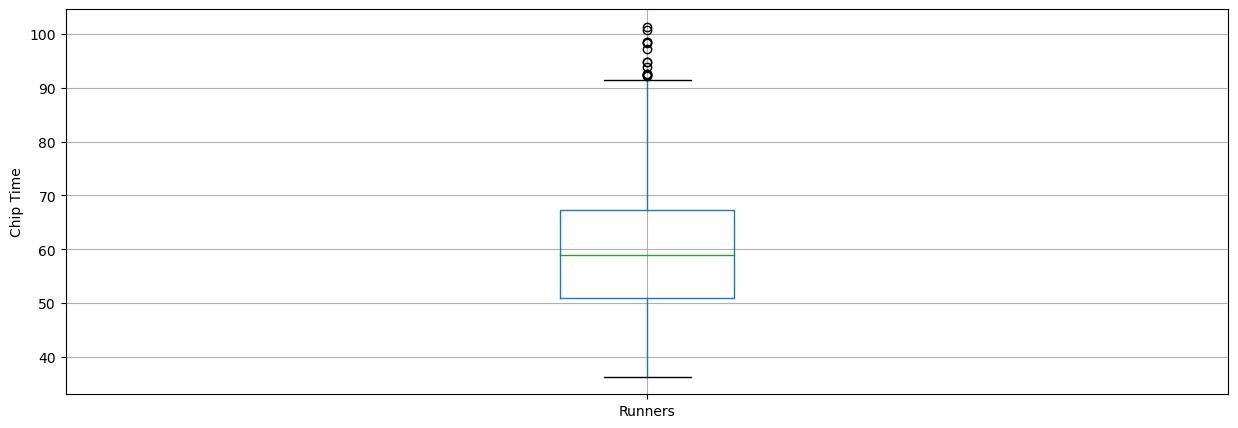

In [132]:
df7.boxplot(column='Runner_mins')
plt.grid(True,axis='y')
plt.ylabel('Chip Time')
plt.xticks([1],['Runners'])

#### Check if the runners finish time follows a normal distribution

C:\Users\Durga P T M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


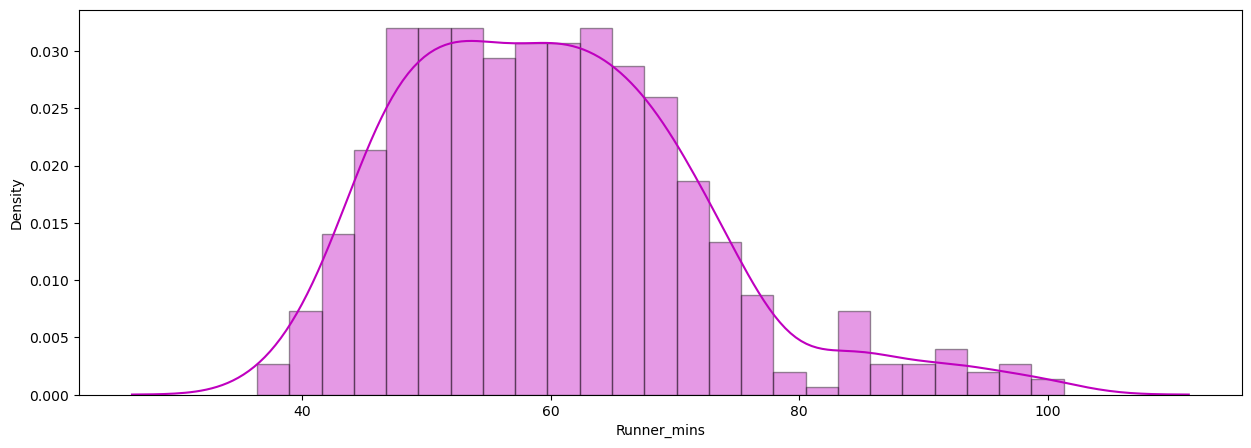

In [136]:
ax=sns.distplot(df7['Runner_mins'],hist=True,kde=True,rug=False,color='m',bins=25,hist_kws={'edgecolor':'black'})
plt.show()

The distribution is almost a normal distribution but not quite

#### Performance difference between male and female runners of various age groups

C:\Users\Durga P T M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


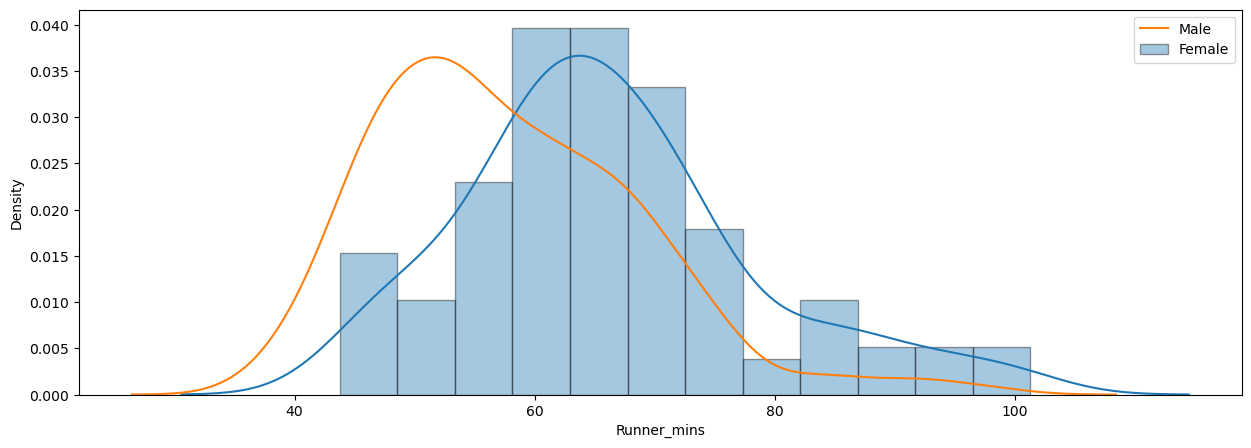

In [141]:
f_mins=df7.loc[df7[' Gender']==' F']['Runner_mins']
m_mins=df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_mins,hist=True,kde=True,rug=False,hist_kws={'edgecolor':'black'},label='Female')
sns.distplot(m_mins,hist=False,kde=True,rug=False,hist_kws={'edgecolor':'black'},label='Male')
plt.legend()

The graph shows that the female runners were slower than male runners.

In [142]:
# To check the summary statistics for females and males separately

g_stats=df7.groupby(" Gender",as_index=True).describe()
g_stats

Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667

#### Boxplot comparison for female and male runners finish time

Text(0.5, 0.98, '')

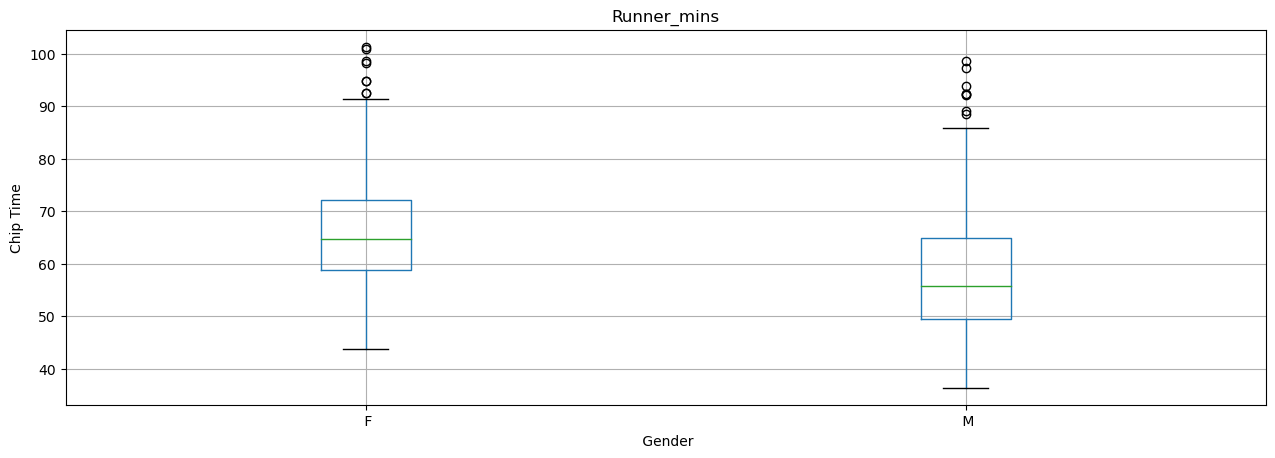

In [143]:
df7.boxplot(column='Runner_mins',by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")